# Clinical trial optimization 
This cookbook will serve as a prototype of the trial optimization feature.

## Loading dependencies

In [1]:
# Cookbook specifics imports
import matplotlib.pyplot as plt
from modAL.models import BayesianOptimizer
from modAL.acquisition import max_EI
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.model_selection import train_test_split

In [2]:
# initializing the learner
kernel = Matern(length_scale=1.0)
regressor = GaussianProcessRegressor(kernel=kernel)

d = 8
n, n_training = 10000, 100
a = 0.3 * np.ones((d,))
X_full = np.random.randn(n, d)
y_full = 1 - np.sum((X_full - a) ** 2, axis=1)
i_max = np.argmax(y_full)


def fitness(x):
    return 1 - np.sum((x - a) ** 2)


optimizer = BayesianOptimizer(
    estimator=regressor,
    # X_training     = X_initial, y_training = y_initial,
    X_training=X_full[:n_training, :],
    y_training=y_full[:n_training],
    query_strategy=max_EI,
)
X_max, y_max = optimizer.get_max()
print(f"Training set optimal value: {y_max}")
print(f"fitness: {fitness(X_max)}")

Training set optimal value: 0.015859329217129625
fitness: 0.015859329217129625


In [3]:
num_queries = 5
queried = []
for n_query in range(num_queries):
    query_idx, query_inst = optimizer.query(X_full)
    queried.append(query_idx[0])
    y = fitness(X_full[query_idx])
    optimizer.teach(X_full[query_idx, :].reshape(1, -1), np.array([y]))
    # X_max, y_max = optimizer.get_max()
    print(f"iteration = {n_query+1}, queried index: {query_idx}, fitness = {y:.3g}")
X_max, y_max = optimizer.get_max()
print(f"X_max={X_max}, y_max={y_max:.3g}")

/nix/store/myl023q46azxg2r1j1fhcljhgyim7xig-python3-3.12.10-env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


iteration = 1, queried index: [5353], fitness = 0.484
iteration = 2, queried index: [4994], fitness = 0.471


/nix/store/myl023q46azxg2r1j1fhcljhgyim7xig-python3-3.12.10-env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/nix/store/myl023q46azxg2r1j1fhcljhgyim7xig-python3-3.12.10-env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


iteration = 3, queried index: [5244], fitness = 0.079
iteration = 4, queried index: [6997], fitness = 0.478
iteration = 5, queried index: [7291], fitness = -0.487
X_max=[-0.03667857 -0.03498937  0.07658153  0.06275014 -0.09034701  0.36805207
  0.16672094  0.20353239], y_max=0.484


/nix/store/myl023q46azxg2r1j1fhcljhgyim7xig-python3-3.12.10-env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/nix/store/myl023q46azxg2r1j1fhcljhgyim7xig-python3-3.12.10-env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


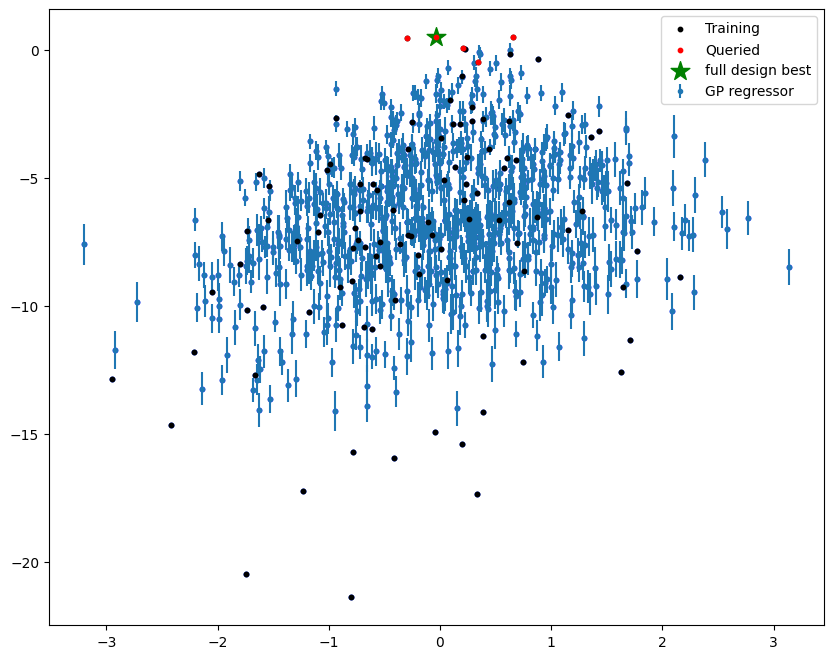

In [4]:
x = X_full[:1000, :]
y_pred, y_std = optimizer.predict(x, return_std=True)
plt.figure(figsize=(10, 8))
plt.scatter(x[:, 0], y_pred, s=10, c="b", zorder=-1)
plt.errorbar(x[:, 0], y_pred, yerr=y_std, fmt=".", zorder=0, label="GP regressor")
plt.scatter(
    optimizer.X_training[:, 0],
    optimizer.y_training,
    c="k",
    s=10,
    label="Training",
    zorder=1,
)
plt.scatter(X_full[queried, 0], y_full[queried], c="r", s=10, label="Queried", zorder=2)
plt.scatter(
    X_full[i_max, 0],
    y_full[i_max],
    s=200,
    marker="*",
    zorder=1.5,
    c="g",
    label="full design best",
)
plt.legend()
plt.show()